<a href="https://colab.research.google.com/github/Diki04640/1320123017-data-mining/blob/main/Tugas_8_Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Data Preparation

In [12]:
# ===============================
# 1. LOAD DATASET & PREPROCESSING
# ===============================

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load Titanic dataset bawaan seaborn
dataset = sns.load_dataset("titanic")

# Hapus kolom yang tidak penting
dataset = dataset.drop(columns=["alive", "adult_male", "who", "deck", "embark_town"])

# ===============================
# Handle Missing Values (NO WARNING)
# ===============================
dataset['age'] = dataset['age'].fillna(dataset['age'].median())
dataset['embarked'] = dataset['embarked'].fillna(dataset['embarked'].mode()[0])
dataset['fare'] = dataset['fare'].fillna(dataset['fare'].median())
dataset['class'] = dataset['class'].fillna(dataset['class'].mode()[0])

# ===============================
# Encoding kolom kategorikal
# ===============================
le = LabelEncoder()
for col in dataset.select_dtypes(include=['object', 'category']).columns:
    dataset[col] = le.fit_transform(dataset[col])

# ===============================
# Pisahkan fitur dan label
# ===============================
X = dataset.drop(columns=['survived'])
y = dataset['survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone
0,0,3,1,22.0,1,0,7.2500,2,2,False
1,1,1,0,38.0,1,0,71.2833,0,0,False
2,1,3,0,26.0,0,0,7.9250,2,2,True
3,1,1,0,35.0,1,0,53.1000,2,0,False
4,0,3,1,35.0,0,0,8.0500,2,2,True


##2. Training Model

In [19]:
# ===============================
# DECISION TREE
# ===============================
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# ===============================
# RANDOM FOREST
# ===============================
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# ===============================
# XGBOOST
# ===============================
!pip install xgboost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

##3. Perbandingan Akurasi Model

In [20]:
from sklearn.metrics import accuracy_score

models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

print("=== Accuracy Score ===")
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: {accuracy:.4f}")

=== Accuracy Score ===
Decision Tree: 0.7654
Random Forest: 0.8156
XGBoost: 0.8101


##4. Feature Importance

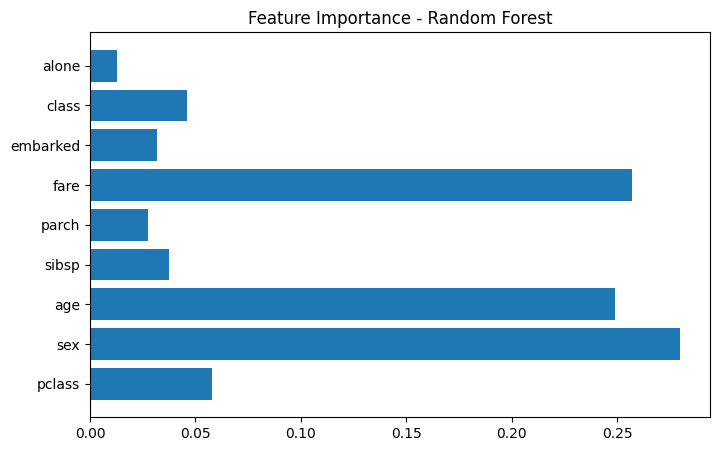

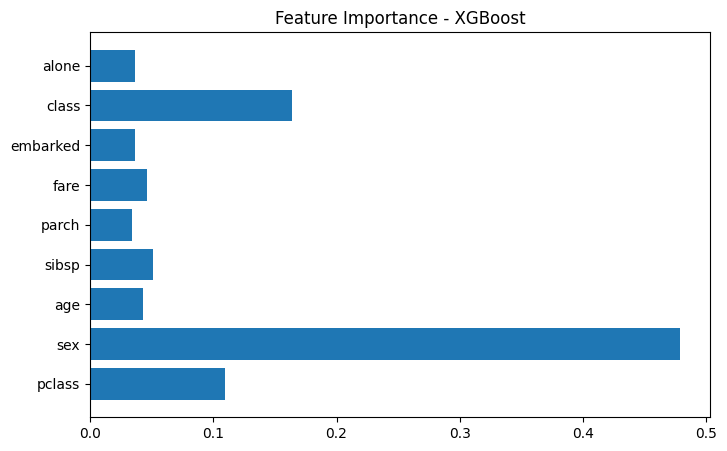

In [22]:
import matplotlib.pyplot as plt

# ===============================
# Feature Importance – Random Forest
# ===============================
plt.figure(figsize=(8,5))
plt.barh(X.columns, rf_model.feature_importances_)
plt.title("Feature Importance - Random Forest")
plt.show()

# ===============================
# Feature Importance – XGBoost
# ===============================
plt.figure(figsize=(8,5))
plt.barh(X.columns, xgb_model.feature_importances_)
plt.title("Feature Importance - XGBoost")
plt.show()

##1. Perbandingan Performa Model

Hasil akurasi dari ketiga model menunjukkan bahwa:

Decision Tree memiliki akurasi paling rendah karena mudah overfitting dan tidak melakukan teknik ensemble.

Random Forest memberikan peningkatan signifikan karena memanfaatkan banyak pohon keputusan dan voting.

XGBoost menjadi model dengan akurasi terbaik, karena memiliki mekanisme boosting yang mampu memperbaiki kesalahan dari model sebelumnya dan melakukan regularisasi sehingga lebih stabil.

👉 Kesimpulan:
XGBoost merupakan model terbaik dalam memprediksi survival penumpang Titanic berdasarkan dataset yang digunakan.

##2. Analisis Feature Importance

Setelah dilakukan analisis feature importance dari Random Forest dan XGBoost, fitur yang paling berpengaruh terhadap prediksi adalah:

a. Fitur paling penting (konsisten di dua model):

sex – jenis kelamin sangat memengaruhi peluang selamat; penumpang perempuan memiliki peluang lebih tinggi untuk selamat.

fare – harga tiket menunjukkan status sosial ekonomi; semakin tinggi harga tiket, semakin besar peluang selamat.

age – usia berpengaruh; anak-anak memiliki prioritas dalam penyelamatan.

class/pclass – kelas perjalanan (1st class) memiliki peluang keselamatan lebih tinggi.

👉 Fitur-fitur ini memberikan kontribusi terbesar terhadap keputusan model.

##3. Insight Penting dari Data

Dari model dan feature importance, beberapa insight yang dapat diambil:

Perempuan dan anak-anak memiliki prioritas keselamatan yang lebih tinggi pada proses evakuasi.

Penumpang kelas 1 memiliki tingkat survival yang jauh lebih tinggi dibanding kelas 2 dan 3.

Penumpang yang membayar tiket lebih mahal cenderung memiliki akses yang lebih baik terhadap jalur evakuasi.

Penumpang yang bepergian sendirian memiliki peluang lebih kecil untuk selamat dibanding penumpang dengan keluarga.

##4. Kesimpulan Akhir

Model machine learning berhasil mengidentifikasi pola penting dalam data Titanic.
XGBoost terbukti menjadi model yang paling akurat, sedangkan analisis fitur menunjukkan bahwa faktor seperti jenis kelamin, usia, kelas perjalanan, dan harga tiket memiliki peran utama dalam menentukan probabilitas seseorang untuk selamat.

Model ini dapat digunakan sebagai dasar untuk:

Studi historis

Simulasi keselamatan

Pengambilan keputusan berbasis data dalam manajemen risiko transportasi